In [41]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime

In [42]:
# Specify year, which determines which file to use
desired_year = '2021'

In [43]:
# Load csv file into pandas dataframe
# For this exercise, we are using site ORIN7, located at Oregon Inlet pier.
# It appears to be the closest site having wind speed and direction data.
csv_folder = "C:\\Users\\s44ba\\Documents\\Projects\\JeanettesPier\\Data\\Wind\\"
csv_filename = 'orin7h' + desired_year + '.txt'
csv_fullpath = csv_folder + csv_filename
df = pd.read_csv(csv_fullpath, header=2, sep='\\s+')
num_rows = len(df)

In [44]:
# Assign column names
'''''
#YY  MM DD hh mm WDIR WSPD GST  WVHT   DPD   APD MWD   PRES  ATMP  WTMP  DEWP  VIS  TIDE
#yr  mo dy hr mn degT m/s  m/s     m   sec   sec degT   hPa  degC  degC  degC   mi    ft
2021 01 01 00 00 292  7.5 10.8 99.00 99.00 99.00 999 1023.2  15.5  11.0 999.0 99.0 99.00
'''''
df.columns = ['YY', 'MM', 'DD', 'hh', 'mm', 'WDIR', 'WSPD', 'GST', 'WVHT', 'DPD', 'APD', 'MWD', 'PRES', 'ATMP',  'WTMP',  'DEWP',  'VIS',  'TIDE']
df.head
df.describe()

,YY,MM,DD,hh,mm,WDIR,WSPD,GST,WVHT,DPD,APD,MWD,PRES,ATMP,WTMP,DEWP,VIS,TIDE
count,82151.0,82151.000000,82151.000000,82151.000000,82151.000000,82151.000000,82151.000000,82151.000000,82151.0,82151.0,82151.0,82151.0,82151.000000,82151.000000,82151.000000,82151.0,82151.0,82151.0
mean,2021.0,6.775048,15.870081,11.485387,27.004419,178.402697,5.793614,7.338777,99.0,99.0,99.0,999.0,1792.362456,35.632482,30.624254,999.0,99.0,99.0
std,0.0,3.371989,8.722726,6.915883,17.237174,131.487581,8.602184,8.685524,0.0,0.0,0.0,0.0,2521.452580,132.120801,104.195085,0.0,0.0,0.0
min,2021.0,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,99.0,99.0,99.0,999.0,999.300000,-1.500000,5.000000,999.0,99.0,99.0
25%,2021.0,4.000000,8.000000,5.000000,12.000000,54.000000,3.100000,4.200000,99.0,99.0,99.0,999.0,1014.200000,11.800000,13.900000,999.0,99.0,99.0
50%,2021.0,7.000000,16.000000,11.000000,30.000000,192.000000,4.900000,6.400000,99.0,99.0,99.0,999.0,1018.600000,18.300000,19.800000,999.0,99.0,99.0
75%,2021.0,10.000000,23.000000,17.000000,42.000000,248.000000,6.800000,8.700000,99.0,99.0,99.0,999.0,1022.800000,24.500000,26.000000,999.0,99.0,99.0
max,2021.0,12.000000,31.000000,23.000000,54.000000,999.000000,99.000000,99.000000,99.0,99.0,99.0,999.0,9999.000000,999.000000,999.000000,999.0,99.0,99.0


In [45]:
# Add new column, timestamp, initialized to 1/1/1970
df["timestamp"] = datetime(1970,1,1)

In [46]:
# Derive timestamp
for k in range(num_rows):
    df.loc[k,"timestamp"] = datetime(df.loc[k, "YY"], df.loc[k, "MM"], df.loc[k,"DD"], df.loc[k,"hh"], df.loc[k,"mm"])

print(df.head)

<bound method NDFrame.head of          YY  MM  DD  hh  mm  WDIR  WSPD  GST  WVHT   DPD   APD  MWD    PRES  \
0      2021   1   1   0   6   296   5.3  9.1  99.0  99.0  99.0  999  1023.4   
1      2021   1   1   0  12   289   3.2  6.4  99.0  99.0  99.0  999  1023.5   
2      2021   1   1   0  18   286   2.8  4.3  99.0  99.0  99.0  999  1023.6   
3      2021   1   1   0  24   294   3.3  4.0  99.0  99.0  99.0  999  1023.8   
4      2021   1   1   0  30   302   3.2  4.2  99.0  99.0  99.0  999  1023.7   
...     ...  ..  ..  ..  ..   ...   ...  ...   ...   ...   ...  ...     ...   
82146  2021  12  31  23  30   178   2.4  3.8  99.0  99.0  99.0  999  1016.2   
82147  2021  12  31  23  36   182   3.2  4.0  99.0  99.0  99.0  999  1016.3   
82148  2021  12  31  23  42   187   3.7  4.5  99.0  99.0  99.0  999  1016.2   
82149  2021  12  31  23  48   195   3.3  4.3  99.0  99.0  99.0  999  1016.1   
82150  2021  12  31  23  54   202   3.1  4.1  99.0  99.0  99.0  999  1016.2   

       ATMP  WTMP   D

In [47]:
# Remove rows where wind speed is 99 or wind direction is 999.
df_qa_wspd = df[df["WSPD"]<99.0]
df_qa_wspd_wdir = df_qa_wspd[df_qa_wspd["WDIR"]<999.0]

In [48]:
df_qa_wspd_wdir.head()

,YY,MM,DD,hh,mm,WDIR,WSPD,GST,WVHT,DPD,APD,MWD,PRES,ATMP,WTMP,DEWP,VIS,TIDE,timestamp
0,2021,1,1,0,6,296,5.3,9.1,99.0,99.0,99.0,999,1023.4,14.8,11.0,999.0,99.0,99.0,2021-01-01 00:06:00
1,2021,1,1,0,12,289,3.2,6.4,99.0,99.0,99.0,999,1023.5,14.7,11.0,999.0,99.0,99.0,2021-01-01 00:12:00
2,2021,1,1,0,18,286,2.8,4.3,99.0,99.0,99.0,999,1023.6,14.5,11.1,999.0,99.0,99.0,2021-01-01 00:18:00
3,2021,1,1,0,24,294,3.3,4.0,99.0,99.0,99.0,999,1023.8,14.4,11.1,999.0,99.0,99.0,2021-01-01 00:24:00
4,2021,1,1,0,30,302,3.2,4.2,99.0,99.0,99.0,999,1023.7,14.3,11.1,999.0,99.0,99.0,2021-01-01 00:30:00


In [49]:
df_qa_wspd_wdir.describe()

,YY,MM,DD,hh,mm,WDIR,WSPD,GST,WVHT,DPD,APD,MWD,PRES,ATMP,WTMP,DEWP,VIS,TIDE,timestamp
count,81520.0,81520.000000,81520.000000,81520.000000,81520.000000,81520.000000,81520.000000,81520.000000,81520.0,81520.0,81520.0,81520.0,81520.000000,81520.000000,81520.000000,81520.0,81520.0,81520.0,81520
mean,2021.0,6.793180,15.871111,11.506600,26.989254,172.050920,5.072157,6.629280,99.0,99.0,99.0,999.0,1788.009430,35.347575,30.382030,999.0,99.0,99.0,2021-07-10 18:06:40.601570
min,2021.0,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,99.0,99.0,99.0,999.0,999.300000,-1.500000,5.000000,999.0,99.0,99.0,2021-01-01 00:06:00
25%,2021.0,4.000000,8.000000,6.000000,12.000000,54.000000,3.100000,4.200000,99.0,99.0,99.0,999.0,1014.200000,11.900000,13.900000,999.0,99.0,99.0,2021-04-17 21:16:30
50%,2021.0,7.000000,16.000000,12.000000,24.000000,192.000000,4.800000,6.400000,99.0,99.0,99.0,999.0,1018.600000,18.300000,19.800000,999.0,99.0,99.0,2021-07-13 01:27:00
75%,2021.0,10.000000,23.000000,17.000000,42.000000,246.000000,6.700000,8.600000,99.0,99.0,99.0,999.0,1022.800000,24.600000,26.000000,999.0,99.0,99.0,2021-10-06 06:31:30
max,2021.0,12.000000,31.000000,23.000000,54.000000,360.000000,18.100000,99.000000,99.0,99.0,99.0,999.0,9999.000000,999.000000,999.000000,999.0,99.0,99.0,2021-12-31 23:54:00
std,0.0,3.359354,8.730281,6.903339,17.214304,110.318398,2.608555,3.238004,0.0,0.0,0.0,0.0,2515.013256,130.974034,102.923708,0.0,0.0,0.0,NaN


In [50]:
# Set the index to be the timestamp value
df_better = df_qa_wspd_wdir.reset_index().set_index('timestamp')
df_better.head()

,index,YY,MM,DD,hh,mm,WDIR,WSPD,GST,WVHT,DPD,APD,MWD,PRES,ATMP,WTMP,DEWP,VIS,TIDE
timestamp,,,,,,,,,,,,,,,,,,,
2021-01-01 00:06:00,0,2021,1,1,0,6,296,5.3,9.1,99.0,99.0,99.0,999,1023.4,14.8,11.0,999.0,99.0,99.0
2021-01-01 00:12:00,1,2021,1,1,0,12,289,3.2,6.4,99.0,99.0,99.0,999,1023.5,14.7,11.0,999.0,99.0,99.0
2021-01-01 00:18:00,2,2021,1,1,0,18,286,2.8,4.3,99.0,99.0,99.0,999,1023.6,14.5,11.1,999.0,99.0,99.0
2021-01-01 00:24:00,3,2021,1,1,0,24,294,3.3,4.0,99.0,99.0,99.0,999,1023.8,14.4,11.1,999.0,99.0,99.0
2021-01-01 00:30:00,4,2021,1,1,0,30,302,3.2,4.2,99.0,99.0,99.0,999,1023.7,14.3,11.1,999.0,99.0,99.0


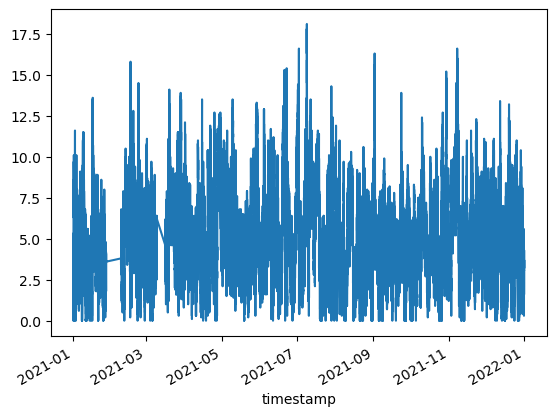

In [51]:
# Plot WSPD, WDIR
df_better.WSPD.plot();

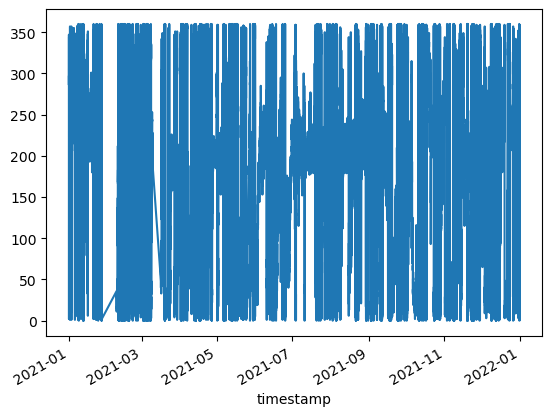

In [52]:
df_better.WDIR.plot();

In [53]:
df_better.shape

(81520, 19)

In [54]:
df_qa

,index,YY,MM,DD,hh,mm,WDIR,WSPD,GST,WVHT,DPD,APD,MWD,PRES,ATMP,WTMP,DEWP,VIS,TIDE
timestamp,,,,,,,,,,,,,,,,,,,
2021-01-01 00:06:00,0,2021,1,1,0,6,296,5.3,9.1,99.0,99.0,99.0,999,1023.4,14.8,11.0,999.0,99.0,99.0
2021-01-01 00:12:00,1,2021,1,1,0,12,289,3.2,6.4,99.0,99.0,99.0,999,1023.5,14.7,11.0,999.0,99.0,99.0
2021-01-01 00:18:00,2,2021,1,1,0,18,286,2.8,4.3,99.0,99.0,99.0,999,1023.6,14.5,11.1,999.0,99.0,99.0
2021-01-01 00:24:00,3,2021,1,1,0,24,294,3.3,4.0,99.0,99.0,99.0,999,1023.8,14.4,11.1,999.0,99.0,99.0
2021-01-01 00:30:00,4,2021,1,1,0,30,302,3.2,4.2,99.0,99.0,99.0,999,1023.7,14.3,11.1,999.0,99.0,99.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-31 23:30:00,82146,2021,12,31,23,30,178,2.4,3.8,99.0,99.0,99.0,999,1016.2,12.5,16.3,999.0,99.0,99.0
2021-12-31 23:36:00,82147,2021,12,31,23,36,182,3.2,4.0,99.0,99.0,99.0,999,1016.3,12.5,16.4,999.0,99.0,99.0
2021-12-31 23:42:00,82148,2021,12,31,23,42,187,3.7,4.5,99.0,99.0,99.0,999,1016.2,12.5,16.4,999.0,99.0,99.0


In [55]:
df_qa.describe()

,index,YY,MM,DD,hh,mm,WDIR,WSPD,GST,WVHT,DPD,APD,MWD,PRES,ATMP,WTMP,DEWP,VIS,TIDE
count,81520.000000,81520.0,81520.000000,81520.000000,81520.000000,81520.000000,81520.000000,81520.000000,81520.000000,81520.0,81520.0,81520.0,81520.0,81520.000000,81520.000000,81520.000000,81520.0,81520.0,81520.0
mean,41190.120559,2021.0,6.793180,15.871111,11.506600,26.989254,172.050920,5.072157,6.629280,99.0,99.0,99.0,999.0,1788.009430,35.347575,30.382030,999.0,99.0,99.0
std,23645.352589,0.0,3.359354,8.730281,6.903339,17.214304,110.318398,2.608555,3.238004,0.0,0.0,0.0,0.0,2515.013256,130.974034,102.923708,0.0,0.0,0.0
min,0.000000,2021.0,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,99.0,99.0,99.0,999.0,999.300000,-1.500000,5.000000,999.0,99.0,99.0
25%,20736.750000,2021.0,4.000000,8.000000,6.000000,12.000000,54.000000,3.100000,4.200000,99.0,99.0,99.0,999.0,1014.200000,11.900000,13.900000,999.0,99.0,99.0
50%,41195.500000,2021.0,7.000000,16.000000,12.000000,24.000000,192.000000,4.800000,6.400000,99.0,99.0,99.0,999.0,1018.600000,18.300000,19.800000,999.0,99.0,99.0
75%,61641.250000,2021.0,10.000000,23.000000,17.000000,42.000000,246.000000,6.700000,8.600000,99.0,99.0,99.0,999.0,1022.800000,24.600000,26.000000,999.0,99.0,99.0
max,82150.000000,2021.0,12.000000,31.000000,23.000000,54.000000,360.000000,18.100000,99.000000,99.0,99.0,99.0,999.0,9999.000000,999.000000,999.000000,999.0,99.0,99.0


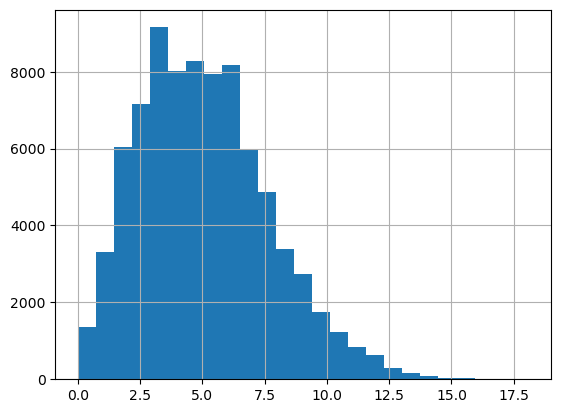

In [56]:
df_better.WSPD.hist(bins=25);

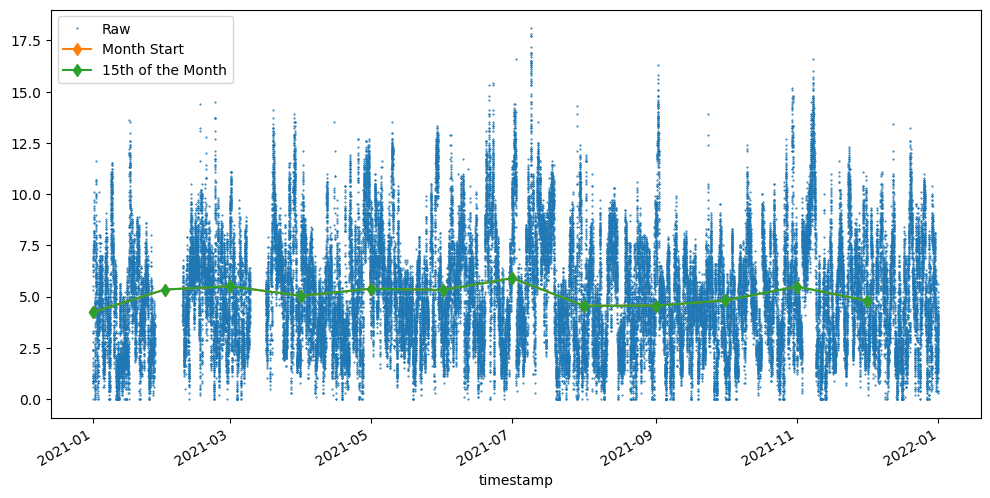

In [57]:
# Let's try this again, but add a 15-day offset to the monthly average 

from datetime import timedelta

fig, ax = plt.subplots()
fig.set_size_inches(12, 6)
df_better['WSPD'].plot(ax=ax,label='Raw', linestyle='None', marker='.', markersize=1)
df_better['WSPD'].resample('MS').mean().plot(ax=ax,label='Month Start',marker='d') #MS=Month Start
df_better['WSPD'].resample('MS',offset=timedelta(days=15)).mean().plot(ax=ax,label='15th of the Month',marker='d')
plt.legend();

In [58]:
# Quantile Function Definitions
def q1(x):
    return x.quantile(0.25)

def q2(x):
    return x.median()

def q3(x):
    return x.quantile(0.75)

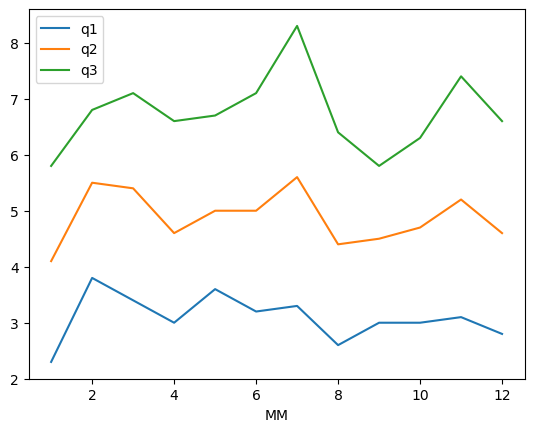

In [59]:
# Calculate the average
monthly_wind_spd = df_better.WSPD.groupby(df_better.MM).agg([q1, q2, q3])

# Quick Plot
monthly_wind_spd.plot();

In [60]:
# Try windrose
from windrose import WindroseAxes

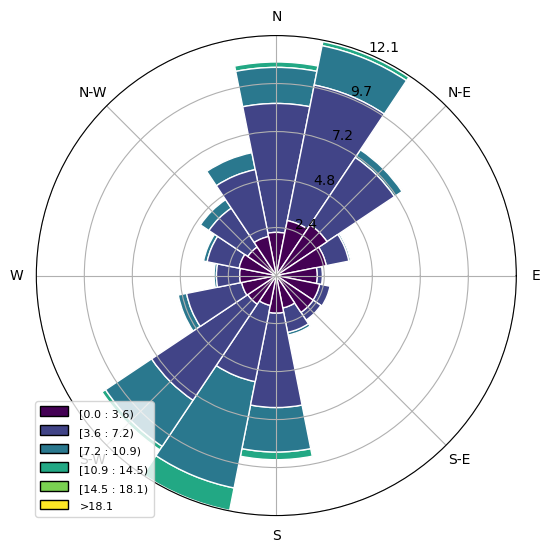

In [61]:
# We need to reset the default plot style for this to work
#sns.set_style("white")

fig = plt.figure(figsize=(6,6))

# Plot the windrose
ax = WindroseAxes.from_ax(fig=fig)
ax.bar(df_better.WDIR, df_better.WSPD, normed=True, opening=1, edgecolor='white')
ax.set_legend();

In [ ]:
# Issues/questions
# Is WDIR to or from?
# WSPD is at what height? Do we need to adjust it to a different height?
